# Solución

Ahora bien, se conoce que el logaritmo natural de la presión de saturación de un componente puro varía con el inverso de la temperatura absoluta.

\begin{equation}
\ln P^\text{sat} = A - \frac{B}{T+C}
\end{equation}

Si se linealiza esta expresión:

\begin{equation}
\ln P = A + \left(AC - B\right)\frac{1}{T} -  C \:\frac{\ln P}{T}
\end{equation}

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from matplotlib import rcParams
import seaborn as sns

In [25]:
params = {'figure.figsize': (7, 7),
          'axes.labelsize': 'x-large', 
          'ytick.labelsize': 'large', 
          'xtick.labelsize': 'large'}
rcParams.update(params) 
sns.set_style('whitegrid')

Los datos experimentales se tiene disponible en una hoja de Excel.

In [26]:
Data_experimental = pd.read_excel('T01_agl_coef_antoine.xlsx', header=None, names=['T (K)', 'Psat (bar)'])

In [27]:
Data_experimental

,T (K),Psat (bar)
0,380,0.080807
1,395,0.161253
2,410,0.385130
3,425,0.568025
4,440,0.878039


In [28]:
Data = Data_experimental.values
T = Data[:,0] 
P =  Data[:,1]
x = 1/T
y = np.log(P)

## Regresion de los datos experimentales

Primero se debe definir de la funcion a minimizar

\begin{equation}
\ln P - \left(A + \left(AC - B\right)\frac{1}{T} -  C \:\frac{\ln P}{T}\right)
\end{equation}

In [29]:
def f(coeficientes, t, psat):
    a, b, c = coeficientes
    return np.log(psat) - (a + (a*c - b) / t -  c * np.log(psat)/t)

In [30]:
x0 = (1000, 100, 20)
result = least_squares(f, x0, args=(T, P))

In [31]:
result

 active_mask: array([0., 0., 0.])
        cost: 0.0008733098000740825
         fun: array([ 0.01943823, -0.03203671,  0.01256001, -0.00958986,  0.00962833])
        grad: array([ 1.07107598e-09,  8.31416231e-12, -2.84209667e-11])
         jac: array([[-0.17173638,  0.00263158, -0.01324442],
       [-0.20318944,  0.00253165, -0.01099234],
       [-0.23234104,  0.00243902, -0.00846675],
       [-0.25943489,  0.00235294, -0.00725361],
       [-0.28468141,  0.00227273, -0.00601649]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 5
        njev: 5
  optimality: 1.071075983113956e-09
      status: 1
     success: True
           x: array([   2.51719345,  335.83146451, -314.74017301])

In [32]:
A, B, C = result.x

In [33]:
print('Los coeficientes de Antoine son:')
print('A = {:.2f}, B = {:.2f}, C = {:.2f}'.format(
    A, B, C
))

Los coeficientes de Antoine son:
A = 2.52, B = 335.83, C = -314.74


## Grafico de comparacion

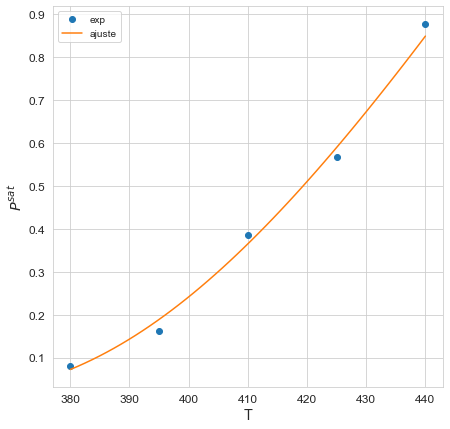

In [34]:
T_calc = np.linspace(380, 440)
Psat = np.exp(A - B / (T_calc + C))

fig, ax = plt.subplots()
ax.plot(T, P, 'o', label='exp')
ax.plot(T_calc, Psat, '-', label='ajuste')
ax.set_xlabel(r'T')
ax.set_ylabel(r'$P^{sat}$')
ax.legend()
            
plt.show()